In [ ]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (2).csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.shape)

(400, 5)


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


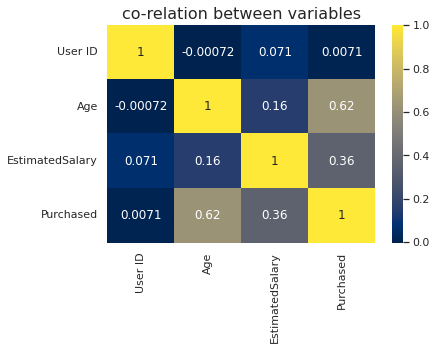

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='cividis')
plt.title('co-relation between variables',fontsize=16)
plt.show()

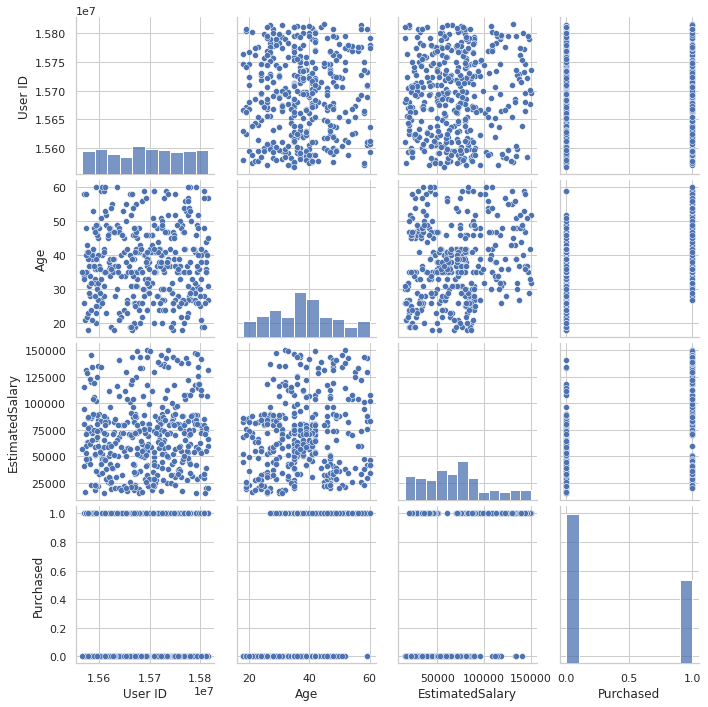

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Estimated Salary')

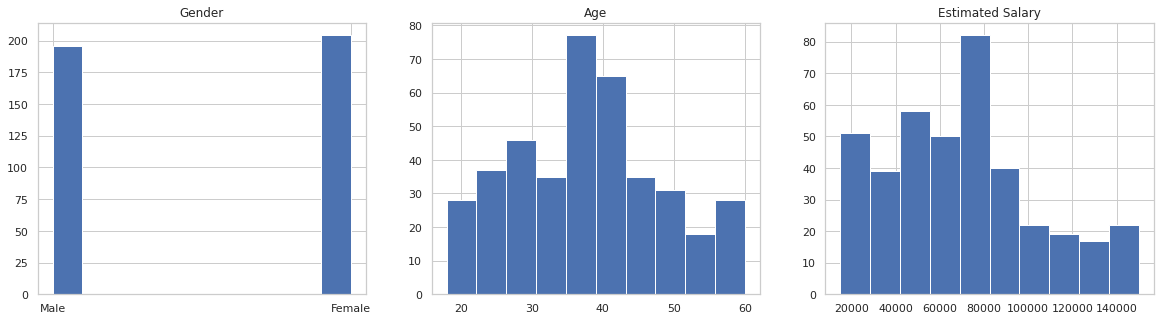

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize= (20,5))

len_gender = len(df.Gender.unique())


ax0.hist(df.Gender)
ax0.set_title("Gender")

ax1.hist(df.Age)
ax1.set_title("Age")

ax2.hist(df.EstimatedSalary)
ax2.set_title("Estimated Salary")

In [ ]:
df.drop(['User ID'], axis =1, inplace =True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.Gender = [1 if i == 'Male' else 0 for i in df.Gender]
print(df['Gender'].head())

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64


In [ ]:
X = df.iloc[:,:3]
y = df.iloc[:,3]
print(X)
print(y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
#print(xtrain)
#print(xtest)
print(ytrain)

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(xtrain)
test_X = sc.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, ytrain)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(test_X)
print(((y_pred,1), (ytest,1)),1)


((array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]), 1), (132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64, 1)) 1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred)
print(cm)
print('Accuracy score:{}'.format(accuracy_score(ytest, y_pred)))

[[56  2]
 [ 5 17]]
Accuracy score:0.9125
